In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = 200

from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 12
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 15

import seaborn as sns
sns.set_style("whitegrid")

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[-5.0, -3.0, -1.0, 1.0, 3.0, 5.0]
[12.0, 12.0, 12.0, 12.0, 12.0]
A
[[-100], [-100], [-100], [-100], [-100], [-100], [-100]]
[[-100], 4.0, 1.0, [-100], [-100], [-100], 12.0]
[[-100], 1.0, 4.0, 1.0, [-100], [-100], 12.0]
[[-100], [-100], 1.0, 4.0, 1.0, [-100], 12.0]
[[-100], [-100], [-100], 1.0, 4.0, 1.0, 12.0]
[[-100], [-100], [-100], [-100], 1.0, 4.0, 12.0]
[[-100], [-100], [-100], [-100], [-100], [-100], [-100]]
M
[0, 2.5384615384615383, 1.8461538461538463, 2.0769230769230766, 1.846153846153846, 2.5384615384615383, 0]
g
[0.4230769230769231, 0.0, -5.423076923076923, 9.0]
[-0.11538461538461535, 1.2692307692307692, -4.153846153846154, 4.0]
[0.0384615384615384, 0.9230769230769231, -1.9615384615384617, 1.0]
[-0.038461538461538436, 1.0384615384615383, 1.1102230246251565e-16, 0.0]
[0.11538461538461538, 0.923076923076923, 1.9615384615384617, 1.0]
[-0.4230769230769231, 1.2692307692307692, 4.153846153846154, 4.0]


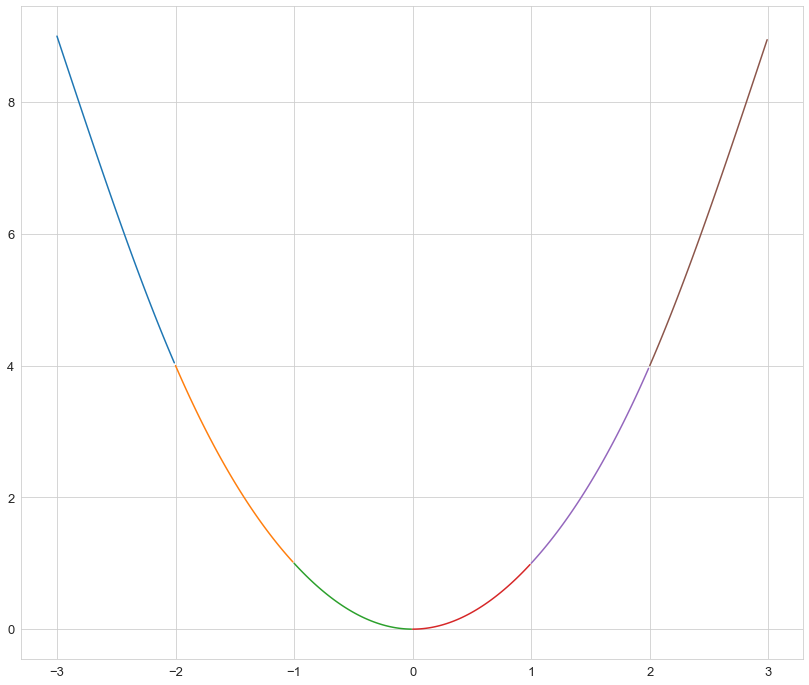

In [193]:
def koefSplain(h, u, d, Deriv,n, boundary):
    A = []
    for i in range(0,n):
        A.append([])
        for j in range(0,n):
            A[i].append([-100])
    #TODO: проверить правильность коэффициентов
    if (n >= 5):
        for i in range(2, n-2):
            A[i][i-1] = h[i]
            A[i][i]=2*(h[i]+h[i+1])
            A[i][i+1]=h[i]
            A[i][n-1]=u[i]
    A[1][2] = h[2]
    A[n-2][n-3]=h[n-2]
    A[1][1] = 2*(h[1]+h[2])
    A[n-2][n-2]=2*(h[n-3]+h[n-2])
    A[1][n-1]=u[0]
    A[n-2][n-1]=u[n-3]
    
    if(boundary == 2):
        A[1][1] = 1.5*h[1] + 2*h[2]
        A[1][n-1]=u[0]-3*(d[0]-Deriv[0])
    elif(boundary == 3):
        A[n-2][n-2]=2*h[n-3]+1.5*h[n-2]
        A[n-2][n-1]=u[n-3]-3*(Deriv[1]-d[n-2])
    elif(boundary == 4):
        A[1][1] = 1.5*h[1] + 2*h[2]
        A[1][n-1]=u[0]-3*(d[0]-Deriv[0])
        A[n-2][n-2]=2*h[n-3]+1.5*h[n-2]
        A[n-2][n-1]=u[n-3]-3*(Deriv[1]-d[n-2])
    print("A")
    for i in range(0,n):
        print(A[i])
    return A

def Progon(A,n):
    alfa = []
    beta = []
    M = []
    for i in range(0,n):
        alfa.append(-100)
        beta.append(-100)
        M.append(-100)
    alfa[1]= -A[1][2]/A[1][1]
    beta[1]= A[1][n-1]/A[1][1]
    if (n > 5):
        for i in range(2, n-2):
            alfa[i]=-A[i][i+1]/(A[i][i-1]*alfa[i-1]+A[i][i])
            beta[i]=(A[i][n-1]-A[i][i-1]*beta[i-1])/(A[i][i-1]*alfa[i-1]+A[i][i])
    
    M[n-2]=(A[n-2][n-1]-A[n-2][n-3]*beta[n-3])/(A[n-2][n-3]*alfa[n-3]+A[n-2][n-2])
    for i in range(n-3,0, -1):
        M[i]=alfa[i]*M[i+1]+beta[i]
    return M
    
def Splain(x,y, Deriv, boundary = 1):
    h = []
    for i in range(0,len(x)-1):
        h.insert(i, x[i+1]-x[i])
    print(h)
    
    d = []
    for i in range(0,len(y)-1):
        d.insert(i,(y[i+1]-y[i])/h[i]);
    print(d)
    
    u = []
    for i in range(0,len(d)-1):
        u.insert(i,6*(d[i+1]-d[i]));
    print(u)
    
    M1=Progon(koefSplain(h, u, d, Deriv,len(x), boundary),len(x));
    n = len(x);
    M = M1
    M[0]=0;
    M[n-1]=0;
    
    if(boundary == 4):
        M[0]=3*(d[0]-Deriv[0])/h[0]-M1[1]/2
        M[n-1]=3*(Deriv[1]-d[n-2])/h[n-2]-M1[n-2]/2
    elif(boundary == 3):
        M[n-1]=3*(Deriv[1]-d[n-2])/h[n-2]-M1[n-2]/2
    elif(boundary == 2):
        M[0]=3*(d[0]-Deriv[0])/h[0]-M1[1]/2
    print("M")
    print(M)
    # матрица коэффициентов
    g = []
    for i in range(0,n-1):
        g.append([])
        for j in range(0,4):
            g[i].append([-100])
            
    for i in range(0,len(x)-1):
        g[i][0]=(M[i+1]-M[i])/(6*h[i])
        g[i][1]=M[i]/2
        g[i][2]=d[i]-h[i]*(2*M[i]+M[i+1])/6
        g[i][3]=y[i]
    print("g")
    for i in range(0,n-1):
        print(g[i])
    for i in range(0, n-1):
        new_x=np.arange(x[i], x[i+1], 0.01)
        new_y=np.polyval(g[i][:],new_x-x[i])
        plt.plot(new_x,new_y)
    
x = [0, 1, 2, 3]
y = [0, 0.5, 2, 1.5]

a = -3
b = 3
n = 7
x = np.linspace(a, b, n)
y = x ** 2


A = 0
B = 0
#plt.plot(x,y)
Splain(x, y,[A,B],0)